<a href="https://colab.research.google.com/github/kserdem/Lazy-Prediction/blob/main/LazyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Veri Sözlüğü



* Veri setinde, bir süpermarket şirketinin farklı mağazalarının, kolaylıkla pozitif tam sayılara dönüştürülmüş mağaza kimliklerine göre verilerini alacaksınız.

* Store ID: Belirli bir mağazanın kimliği.

* Store_Area: Mağazanın fiziksel alanı.

* Items_Available: İlgili mağazada bulunan farklı ürün sayısı.

* DailyCustomerCount: Aylık ortalama olarak mağazaları ziyaret eden müşteri sayısı.

* Store_Sales: Mağazaların yaptığı satışlar (US $).

In [9]:
import pandas as pd
import numpy as np

# Veri Okuma

In [10]:
data=pd.read_csv("/content/drive/MyDrive/Colab_projects/Medium LazyPrediction Lib Project/Stores.csv", index_col=0)
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


# Veri Tanıma ve Görselleştirme

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [ ]:
data.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 504x504 with 0 Axes>

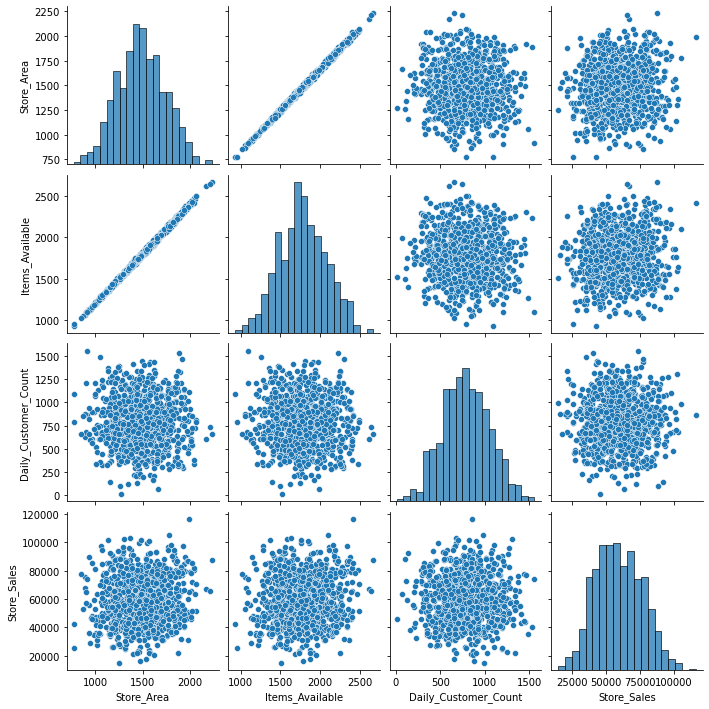

In [ ]:
plt.figure(figsize=(7,7))
sns.pairplot(data)

* Değişkenler aykırı gözlem bakımından incelendiğinde çok az değişkenin aykırı gözlem olduğu görülmektedir. Bu sebeple detaylı aykırı gözlem analizine girilmemiştir.

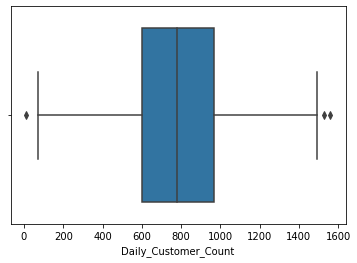

In [ ]:
sns.boxplot(x=data['Daily_Customer_Count'])

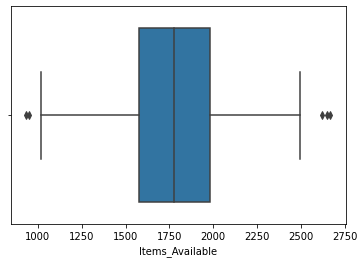

In [ ]:
sns.boxplot(x=data['Items_Available'])

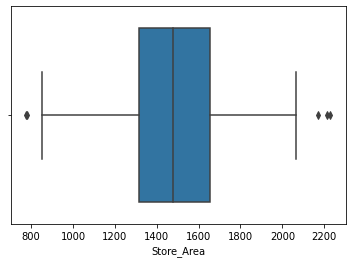

In [ ]:
sns.boxplot(x=data['Store_Area'])

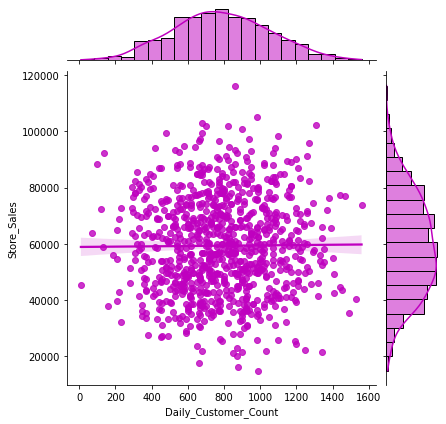

In [ ]:
sns.jointplot('Daily_Customer_Count','Store_Sales',data,kind='reg',color='m')

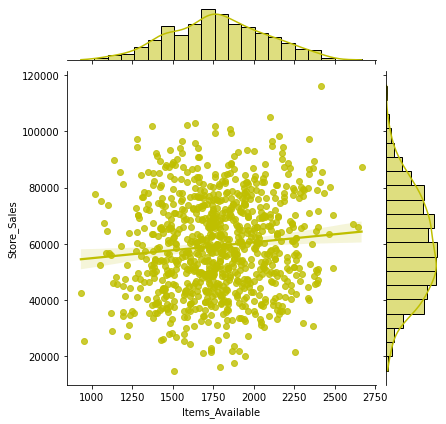

In [ ]:
sns.jointplot('Items_Available','Store_Sales',data,kind='reg',color='y')

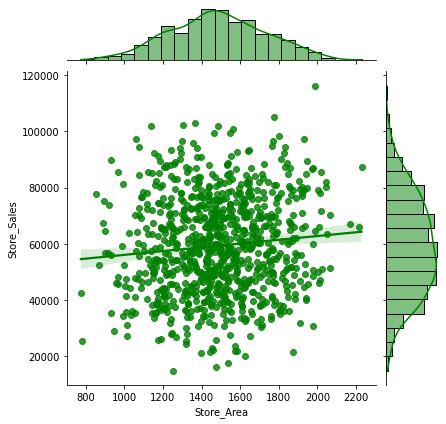

In [ ]:
sns.jointplot('Store_Area','Store_Sales',data,kind='reg',color='g')

* Korelasyon grafiği incelendiğinde değişkenler arasındaki ilişkinin çok çok düşük seviyede olduğu yapılır. Bu sebeple değişkenler birbiriyle neredeyse ilişkisizdir. Burada dikkat edilmesi gereken nokta bağımsız değişkenlerin bağımlı(tahmin değişkeni/ Store_Sales) ile olan korelasyon derecesidir. Modelin problemi güzel anlayabilmesi için bağımsız değişkenlerin kendi arasında ilişkisinin düşük olması (çoklu bağlantı problemi yaşamamak için) bağımlı değişken ile ilişkisinin yüksek olması istenir. 

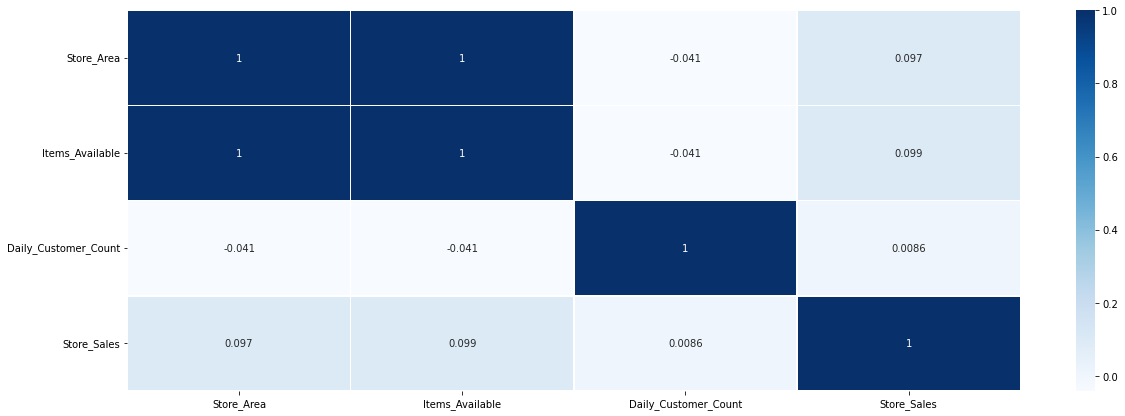

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap='Blues')
plt.show()

# Train- Test Split

In [ ]:
X=data[['Store_Area',	'Items_Available',	'Daily_Customer_Count']]
y=data['Store_Sales']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (716, 3)
y_train (716,)
X_test (180, 3)
y_test (180,)


#Lazy Predict 

** **YORUM:** Ham veri üzerinde herhangi bir işlem uygulamadan model kurulduğunda R2 ve Adjusted R2 değerlerinin oldukça düşük hatta bazı model değerlerinin negatif olduğu görülmektedir. R2 metriği bir regresyon modeli için bağımlı değişkendeki değişim miktarının % kaçının bağımsız değişkenler aracılığıyla açıklandığını söyler. 
* Bu açıklamadan yola çıkarak kurulan modellerin hiç birinin bağımlı değişkendeki değişimi açıklamadığı söylenir. Yani kurulan modellerin herhangi bir başarısından söz edilemez.

In [ ]:
pip install lazypredict

In [2]:
import lazypredict

In [3]:
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:04<00:00, 10.47it/s]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,-0.01,0.01,16442.15,0.02
LinearRegression,-0.01,0.01,16443.80,0.01
TransformedTargetRegressor,-0.01,0.01,16443.80,0.01
Lars,-0.01,0.01,16443.80,0.04
LassoLarsIC,-0.01,0.01,16445.11,0.02
LassoCV,-0.01,0.01,16445.19,0.10
OrthogonalMatchingPursuit,-0.01,0.01,16445.67,0.02
OrthogonalMatchingPursuitCV,-0.01,0.01,16445.67,0.04
LassoLarsCV,-0.01,0.01,16446.68,0.02


# Standart Scaler Dönüşümü Yapıp Yeniden Model Kurulması

*  İlk kurulan modelde başarı elde edilemediği için bağımsız değişkenler üzerinde transformation işlemi gerçekleştirip yeniden model kurmayı denedik. Ancak aşağıdaki model sonuçları incelendiğinde ham veride elde edilen sonuçları elde ettik.

In [4]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler_data= data.copy()
scaler_data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


In [12]:
scaler = StandardScaler()

scaler_data[['Store_Area','Items_Available','Daily_Customer_Count']] = scaler.fit_transform(scaler_data[['Store_Area','Items_Available','Daily_Customer_Count']])
scaler_data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,0.69,0.60,-0.97,66490
2,-0.10,-0.10,-2.17,39820
3,-0.58,-0.58,-0.25,54010
4,-0.14,-0.11,-0.63,53730
5,1.14,1.10,-1.27,46620


In [6]:
X=scaler_data[['Store_Area',	'Items_Available',	'Daily_Customer_Count']]
y=scaler_data['Store_Sales']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (716, 3)
y_train (716,)
X_test (180, 3)
y_test (180,)


In [ ]:
reg_scaler = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_scaler,predictions_scaler = reg_scaler.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:09<00:00,  4.53it/s]


In [ ]:
models_scaler

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,-0.01,0.01,16442.15,0.05
LinearRegression,-0.01,0.01,16443.80,0.02
TransformedTargetRegressor,-0.01,0.01,16443.80,0.05
Lars,-0.01,0.01,16443.80,0.02
LassoLarsIC,-0.01,0.01,16445.11,0.02
LassoCV,-0.01,0.01,16445.19,0.14
OrthogonalMatchingPursuit,-0.01,0.01,16445.67,0.05
OrthogonalMatchingPursuitCV,-0.01,0.01,16445.67,0.05
LassoLarsCV,-0.01,0.01,16446.68,0.02


# Kümeleme Analizi Yapılıp Yeniden Model Kurulması

* Son olarak değişkenleri gruplamak ve modele yeni bir değişken eklemek için modelleme işleminden önce bir kümeleme analizi gerçekleştirdik. Bu kümeleme analizinde optimal küme sayısını 7 olarak belirledik ve veri setindeki gözlemleri 7 kümeye ayırdık. Daha sonra model kurulurken oluşturduğumuz cluster değişkeninide modele bağımsız değişken olarak tanıttık. 
* Lazy Predict ile yeniden modelleme işlemi yapıldığında diğer iki veri seti için 0.01 olan R2 değerinin 0.95'e kadar çıktığını gördük.
* Kurulan 42 model incelendiğinde en iyi modelin 0.95 R2 değeri ile *'HistGradientBoostingRegressor'* olduğunu söyleyebiliriz. Elde edilen R2 skoru literatüre göre kabul görmek ile birlikte daha iyi sonuç elde etmek için lazy prediction'da en iyi çıkan ilk 3 model üzerinde hiperparametre ayarı üzerinde çalışılabilir.

In [7]:
from sklearn.cluster import KMeans

* Standartlaştırılmış Veri Seti

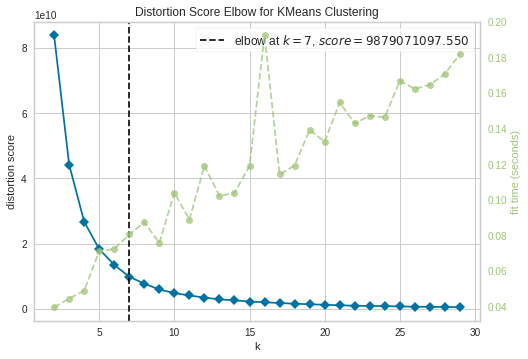

In [13]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,30))
visualizer.fit(scaler_data) 
visualizer.poof()  


* Standartlaştırılmamış Veri Seti

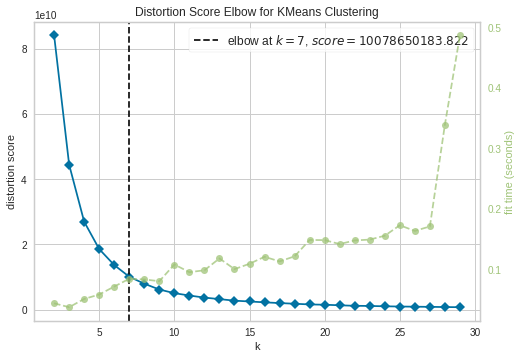

In [14]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,30))
visualizer.fit(data) 
visualizer.poof()  


In [15]:
kmeans = KMeans(n_clusters = 7).fit(data)
kumeler = kmeans.labels_

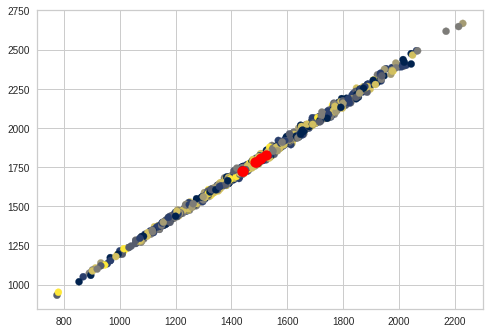

In [23]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = kmeans.labels_, s = 50, cmap = "cividis")
merkezler = kmeans.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 100);

In [17]:
kmeans_predict= kmeans.fit_predict(data)
kmeans_Data= pd.DataFrame(data)
kmeans_Data['Clusters']=kumeler
kmeans_Data.head(15)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Clusters
Store ID,,,,,
1,1659,1961,530,66490,5
2,1461,1752,210,39820,0
3,1340,1609,720,54010,6
4,1451,1748,620,53730,6
5,1770,2111,450,46620,6
6,1442,1733,760,45260,0
7,1542,1858,1030,72240,5
8,1261,1507,1020,37720,0
9,1090,1321,680,46310,6


In [18]:
X=kmeans_Data[['Store_Area',	'Items_Available',	'Daily_Customer_Count','Clusters']]
y=kmeans_Data['Store_Sales']

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (716, 4)
y_train (716,)
X_test (180, 4)
y_test (180,)


In [20]:
reg_cluster = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_cluster,predictions_cluster = reg_cluster.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:03<00:00, 10.85it/s]


In [22]:
models_cluster

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.95,0.95,3823.02,0.38
LGBMRegressor,0.94,0.94,3879.26,0.11
GradientBoostingRegressor,0.94,0.94,3906.45,0.14
RandomForestRegressor,0.94,0.94,3993.57,0.29
BaggingRegressor,0.94,0.94,4060.75,0.04
ExtraTreesRegressor,0.93,0.94,4160.20,0.22
XGBRegressor,0.93,0.93,4219.73,0.17
DecisionTreeRegressor,0.92,0.92,4548.90,0.01
ExtraTreeRegressor,0.90,0.91,5055.69,0.01
